## Aprendizaje Automático

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from patsy import dmatrices
from ggplot import *
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from IPython.display import Image
%matplotlib inline

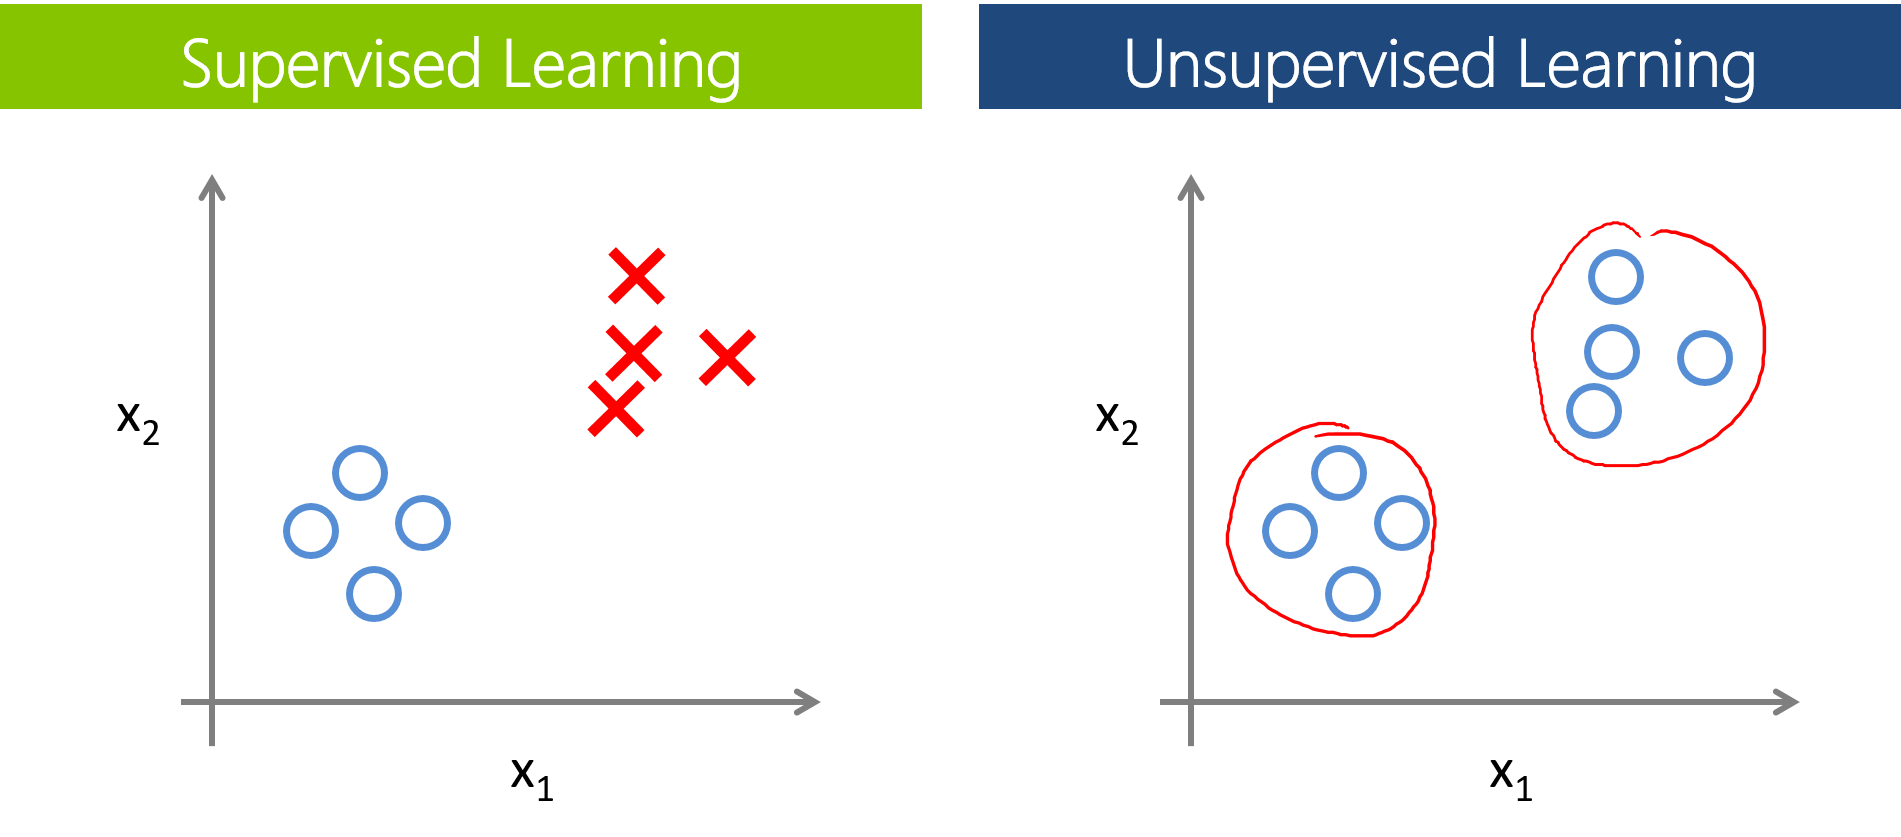

In [23]:
Image("http://oliviaklose.com/content/images/2015/02/2-supervised-vs-unsupervised-1.png")

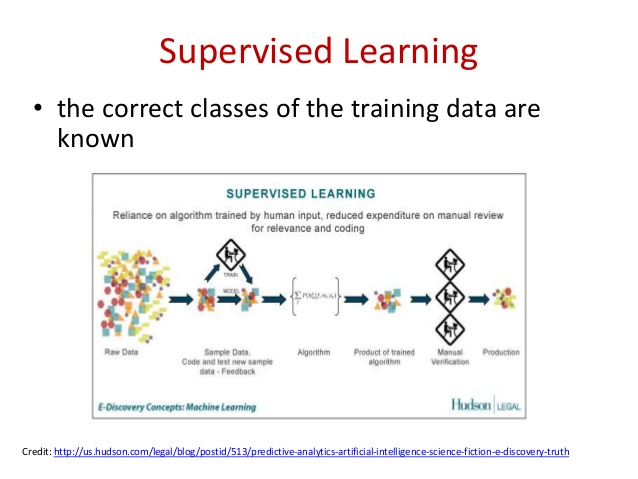

In [24]:
Image("http://image.slidesharecdn.com/introductiontomachinelearning-140907065636-phpapp01/95/introduction-to-machine-learning-11-638.jpg")

## Random Forests

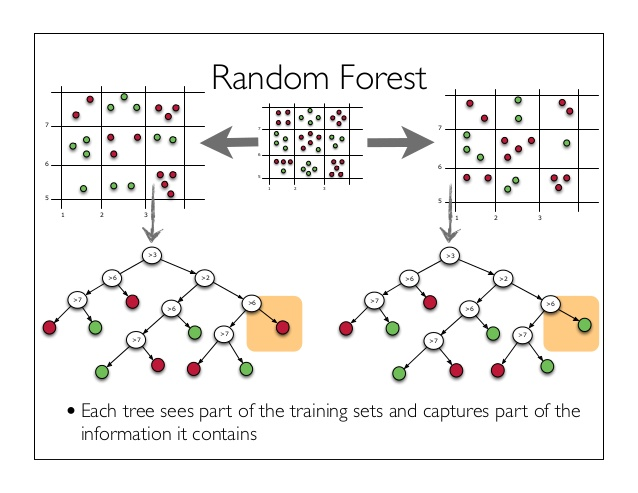

In [25]:
Image("http://image.slidesharecdn.com/janvitekdistributedrandomforest5-2-2013-130504133205-phpapp02/95/jan-vitek-distributedrandomforest522013-8-638.jpg")

In [26]:
df = pd.DataFrame.from_csv("train.csv")

In [27]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

score = results_rf.score(x, y)
print("La presicion del Random Forest fue: {0}".format(score))

La presicion del Random Forest fue: 0.9452247191011236


In [33]:
model = sm.Logit(y,x)
results = {} 
# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula_ml]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Mar 2016   Pseudo R-squ.:                  0.3416
Time:                        18:38:03   Log-Likelihood:                -316.34
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 3.985e-66
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5703      0.480      9.516      0.000         3.629     5.512
C(Pclass)[T.2]      -1.2684      0.298     -4.250      0.000        -1.853    -0.683
C(Pclass)[T.3]      -2.4938      0.296     -8.419      0.000        -3.074    -1.913
C(Sex)[T.male]      -2.6411      0.223    -11.854      0.000        -3.078    -2.204
C(Embarked)[T.Q]    -0.8445      0.599     -1.410      0.159        -2.019     0.330
C(Embarked)[T.S]    -0.4277      0.271     -1.579      0.114        -0.958     0.103
Age                 -0.0437      0.008     -5.272      0.000        -0.060    -0.027
SibSp               -0.3558      0.129     -2.768      0.006        -0.608    -0.104
Parch               -0.0446      0.121     -0.370      0.712        -0.281     0.192
====================================================================================
"""

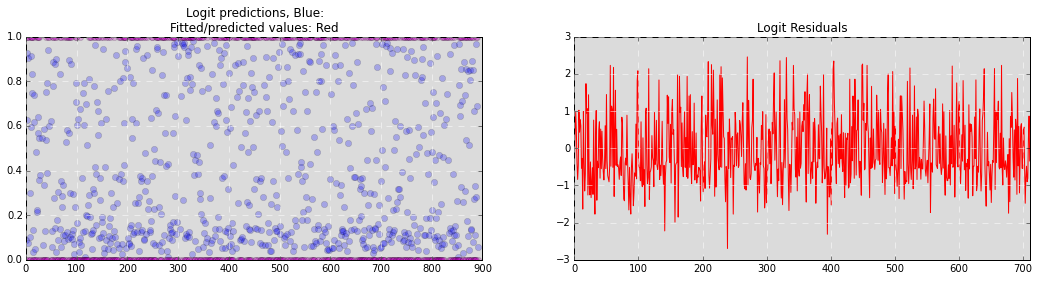

In [34]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

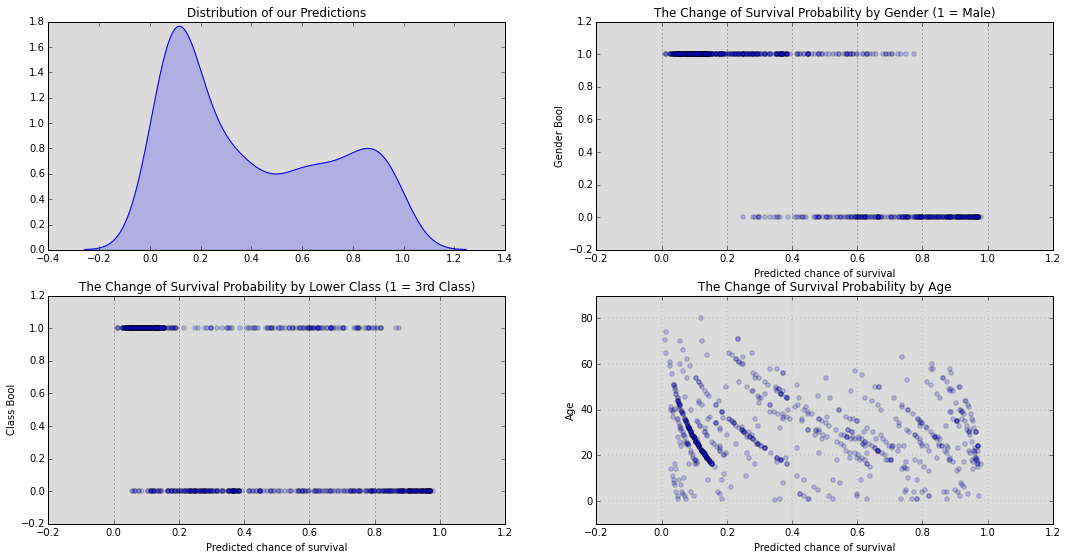

In [38]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224, axisbg="#DBDBDB")
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Este sistema reporta 0.77033 como Media Residual.

## Neural Networks

## NLTK

## Naïve Bayes